In [12]:
# Import libraries here
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import skew
from collections import defaultdict
import math
from datetime import datetime

In [2]:
# read data
df = pd.read_csv('../data/training/training-RestoInfo.zip')
df.head()


,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


In [6]:
def pie_plot(counts, label, colors, col_name):
    plt.pie(counts, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
    plt.savefig(f'../output/graphs/{col_name}_pie_plt.png')
    plt.show()

def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(30, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=8, labelpad=15)
    ax.set_ylabel(ylab, fontsize=8, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f'../output/graphs/{attribute}_bar_plt.png')
    plt.show() 
    
def convert_rest_type(df, col_name):
    dic = {'shop_id':[],col_name:[]}
    for index, row in df[['shop_id',col_name]].iterrows():
        try:
            for t in row[col_name].split(','):
                dic[col_name].append(t)
                dic['shop_id'].append(row['shop_id'])
        except: 
            dic[col_name].append(row[col_name])
            dic['shop_id'].append(row['shop_id'])
    return(pd.DataFrame(dic))

def con(x):
    try:
        return(float(x.split('/')[0]))
    except:
        return(0.0)#missing value
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f'../output/graphs/{attribute}_hist_plt.png')
    plt.show() 

def make_scatter(dataset, attribute1, attribute2, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)

    plt.scatter(dataset[attribute1], dataset[attribute2], alpha=0.5)
    
    plt.tight_layout()
    plt.savefig(f'../output/graphs/{attribute1}_{attribute1}_scatter_plt.png')
    plt.show() 

Shape =  (2069, 15)
Null values % of each columns =  user_id                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           14.451426
votes                           0.000000
location                        0.000000
rest_type                       0.821653
dish_liked                     53.504108
cuisines                        0.000000
approx_cost(for two people)     0.773320
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64
Total number of shops are there =  1665
How many online order you can see below pie chart


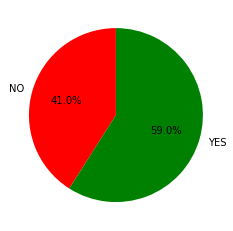

How many book_table you can see below pie chart


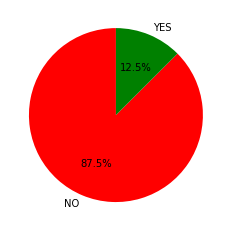

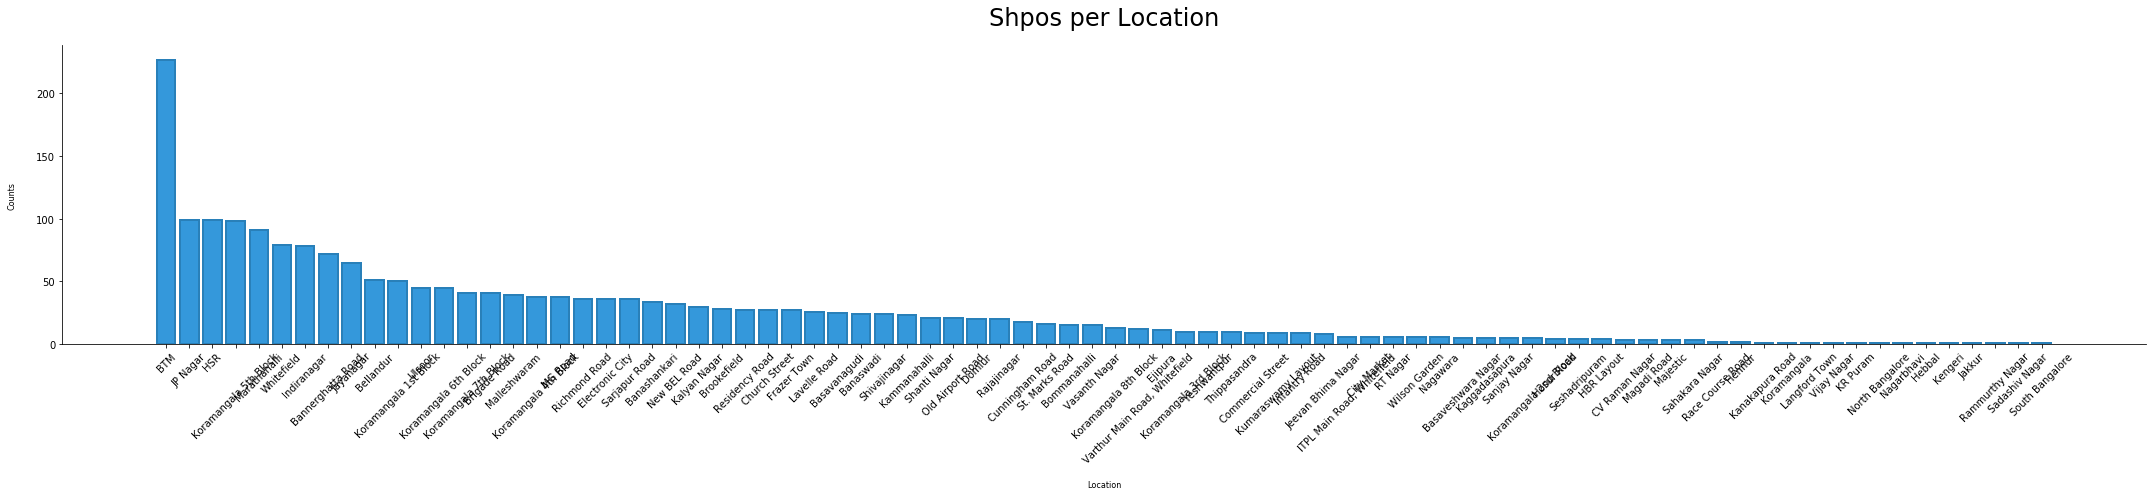

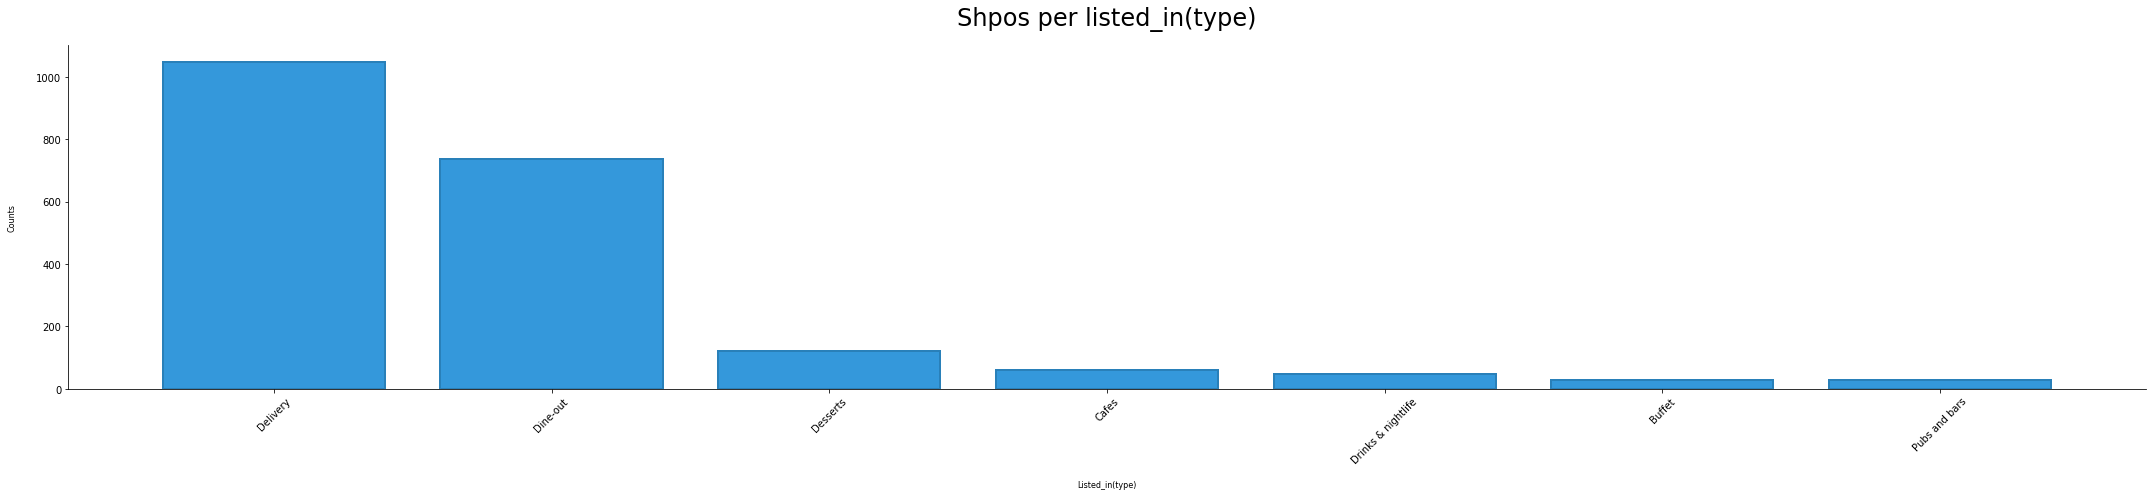

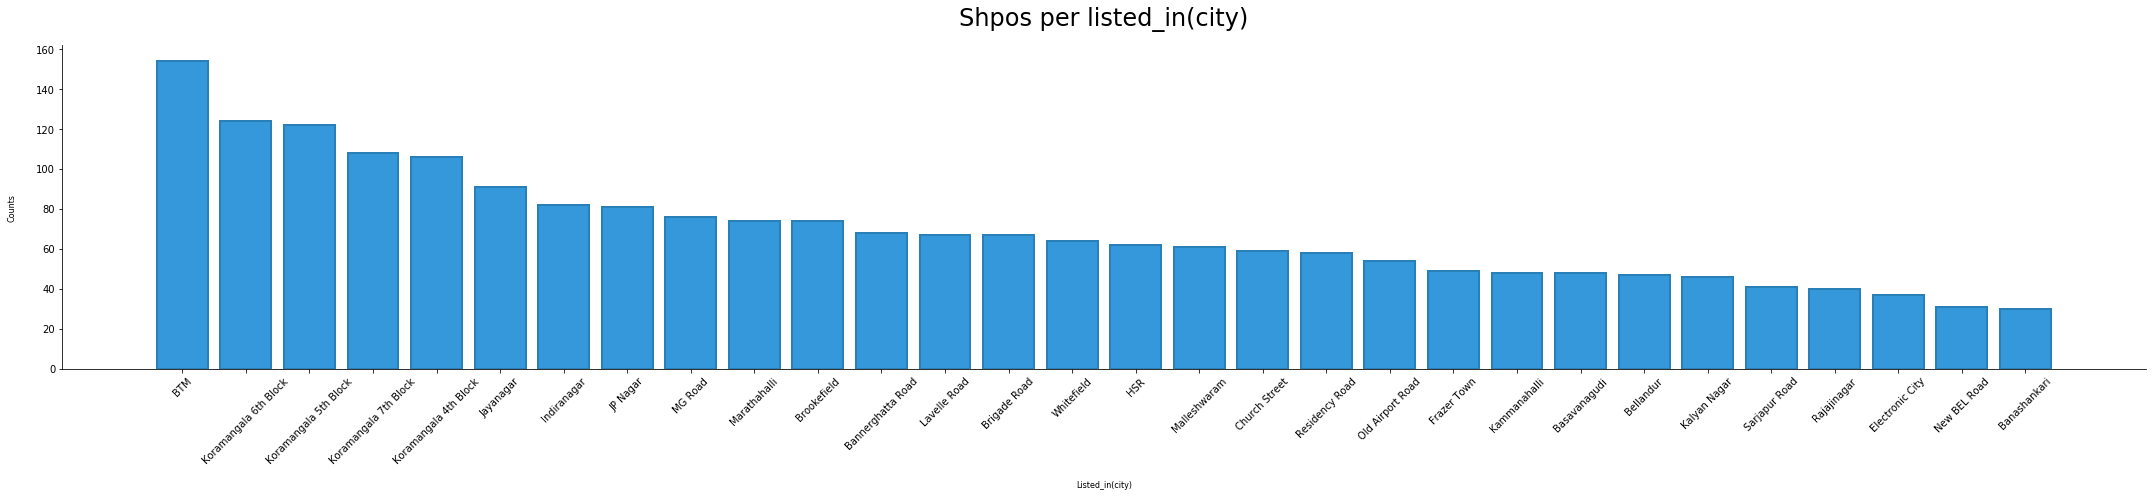

In [4]:
#rename Unnamed: 0 collumn to shop_id
df.rename(columns={'Unnamed: 0':'shop_id'}, inplace=True)
print('=================================')
print('Shape = ', df.shape)
print('=================================')

#Lets find number of null values 
print('Null values % of each columns = ', (df.isnull().sum()/df.shape[0])*100)
print('=================================')
## Mising value 'rate' = 299; 'rest_type' = 17; 'dish_liked' = 1107;
#approx_cost(for two people = 16
# So as you can see 'ish_liked' columne have more then 53% missing value 

##total number of shops are there 
print('Total number of shops are there = ', len(df['name'].unique()))
print('=================================')
print('How many online order you can see below pie chart')
no  = df[df['online_order'] =='No']['online_order'].count()
yes = df[df['online_order'] =='Yes']['online_order'].count()
counts = [no,yes]
label = ['NO', 'YES']
colors = ['r', 'g']
pie_plot(counts,label,colors, 'online_order')

print('=================================')

print('How many book_table you can see below pie chart')
no  = df[df['book_table'] =='No']['book_table'].count()
yes = df[df['book_table'] =='Yes']['book_table'].count()
counts = [no,yes]
label = ['NO', 'YES']
colors = ['r', 'g']
pie_plot(counts,label,colors, 'book_table')

print('=================================')
## Numbe of shopes on each location
make_bar_chart(df, 'location', title='Shpos per Location', xlab='Location', ylab='Counts')
print('=================================')

## Numbe of shopes on each listed_in(type)
make_bar_chart(df, 'listed_in(type)', title='Shpos per listed_in(type)', xlab='Listed_in(type)', ylab='Counts')
print('=================================')

## Numbe of shopes on each listed_in(city)
make_bar_chart(df, 'listed_in(city)', title='Shpos per listed_in(city)', xlab='Listed_in(city)', ylab='Counts')
print('=================================')

### rest_type exploration
    There’s no way to analyze it the way it currently is. What I want to accomplish is the following:
     -- Split the string on the pipe (,) character
     --  Create a new entry for each rest_type
    So, 1 row of 'Beverage Shop, Quick Bites' should become 2 rows, with other information remaining the same. Pandas provides a nice way of accomplishing this:

This way a new DataFrame is created, and the first couple of rows look like this:


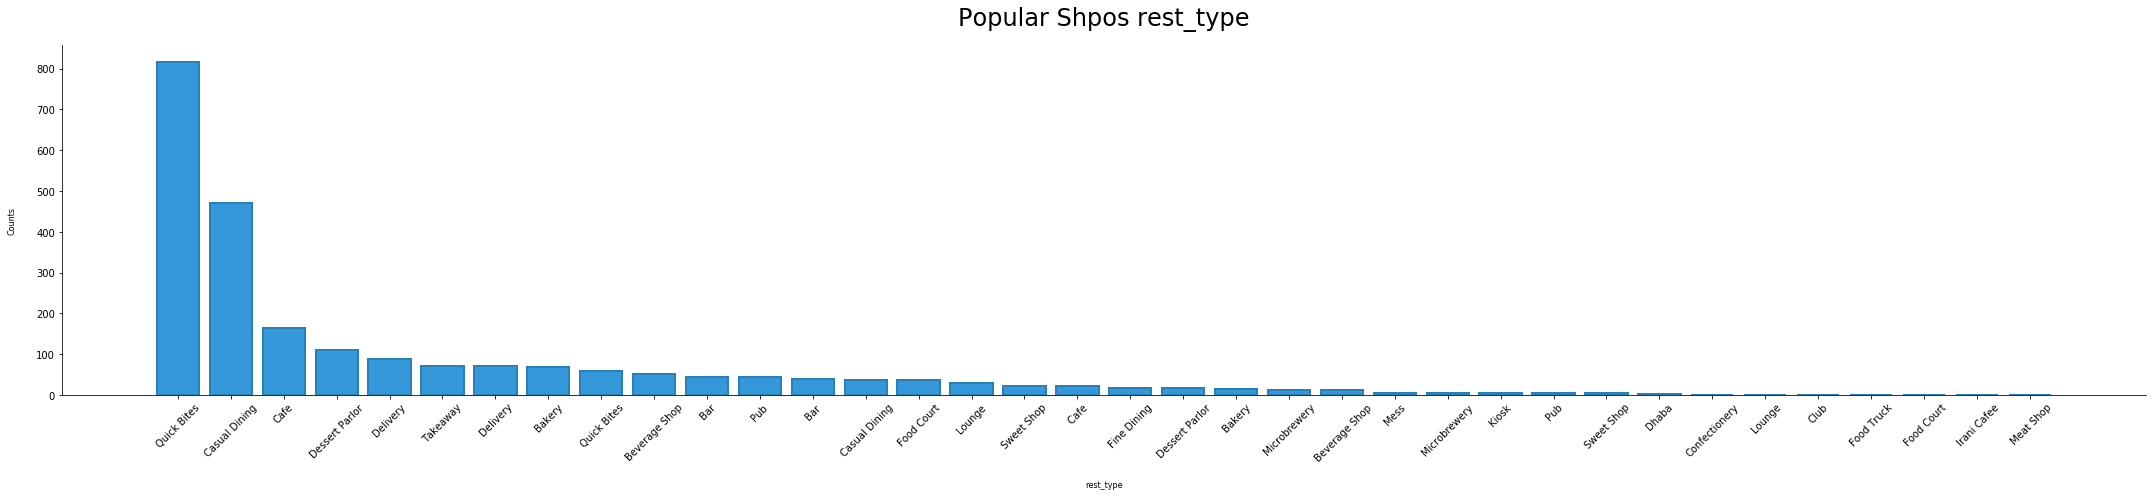

In [7]:
col_name = 'rest_type'
rest_type_df = convert_rest_type(df, col_name)

print("This way a new DataFrame is created, and the first couple of rows look like this:")
rest_type_df.head()
#number of shops rest_type 
make_bar_chart(rest_type_df, 'rest_type', title='Popular Shpos rest_type', xlab='rest_type', ylab='Counts')

### cuisines exploration
    There’s no way to analyze it the way it currently is. What I want to accomplish is the following:
     -- Split the string on the pipe (,) character
     --  Create a new entry for each rest_type


This way a new DataFrame is created, and the first couple of rows look like this:


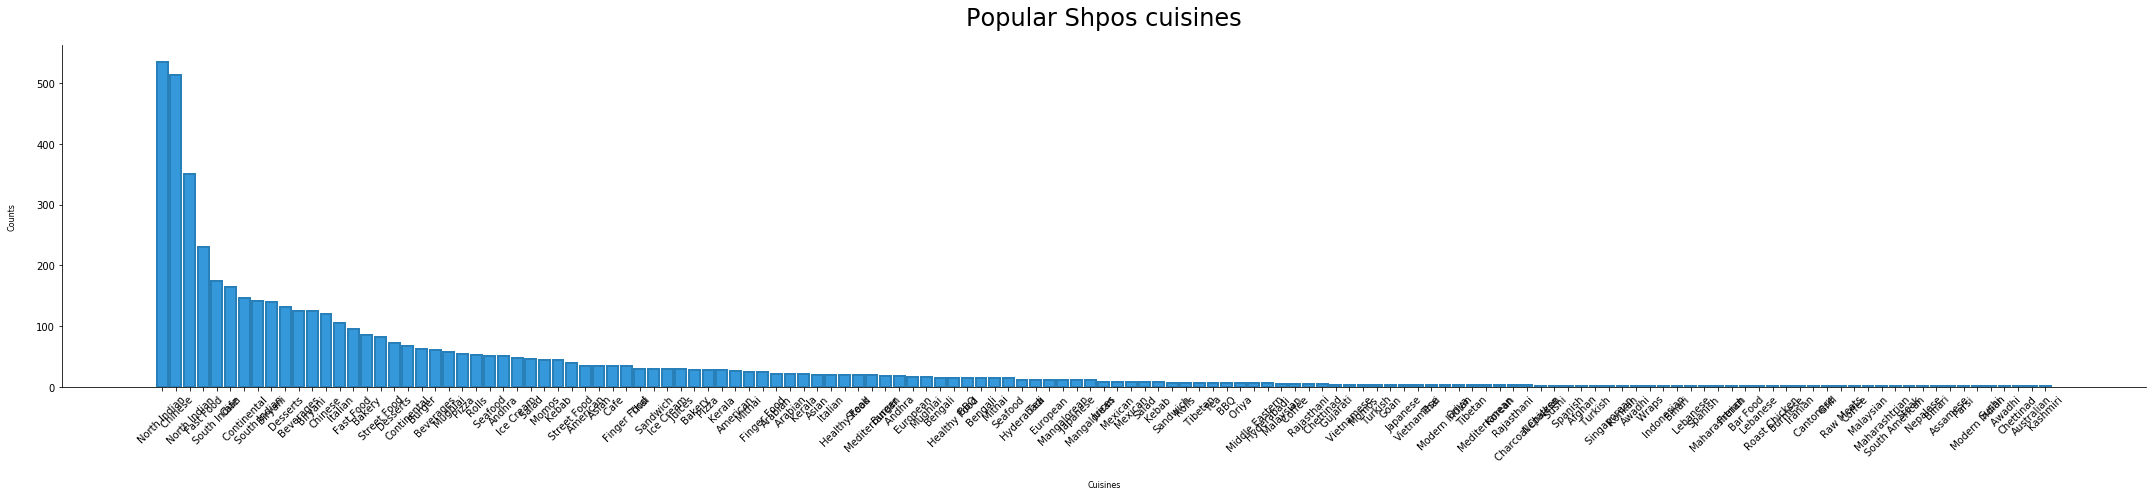

In [8]:
col_name = 'cuisines'

cuisines_df = convert_rest_type(df, col_name)

print("This way a new DataFrame is created, and the first couple of rows look like this:")
cuisines_df.head()
#number of shops rest_type 
make_bar_chart(cuisines_df, 'cuisines', title='Popular Shpos cuisines', xlab='Cuisines', ylab='Counts')

### dish_liked exploration
    There’s no way to analyze it the way it currently is. What I want to accomplish is the following:
     -- Split the string on the pipe (,) character
     --  Create a new entry for each rest_type


This way a new DataFrame is created, and the first couple of rows look like this:


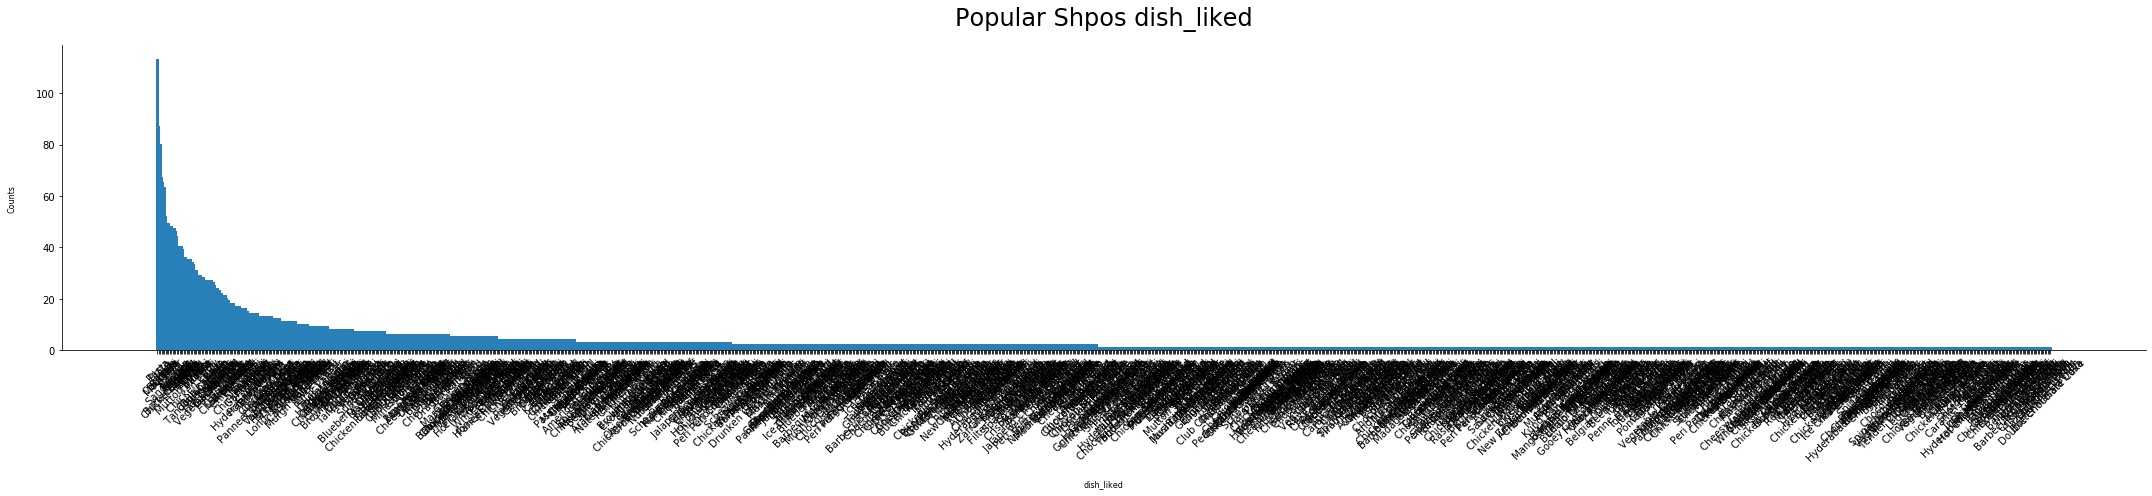

In [9]:
col_name = 'dish_liked'

ddf = convert_rest_type(df, col_name)

print("This way a new DataFrame is created, and the first couple of rows look like this:")
ddf.head()
#number of shops rest_type 
make_bar_chart(ddf, 'dish_liked', title='Popular Shpos dish_liked', xlab='dish_liked', ylab='Counts')

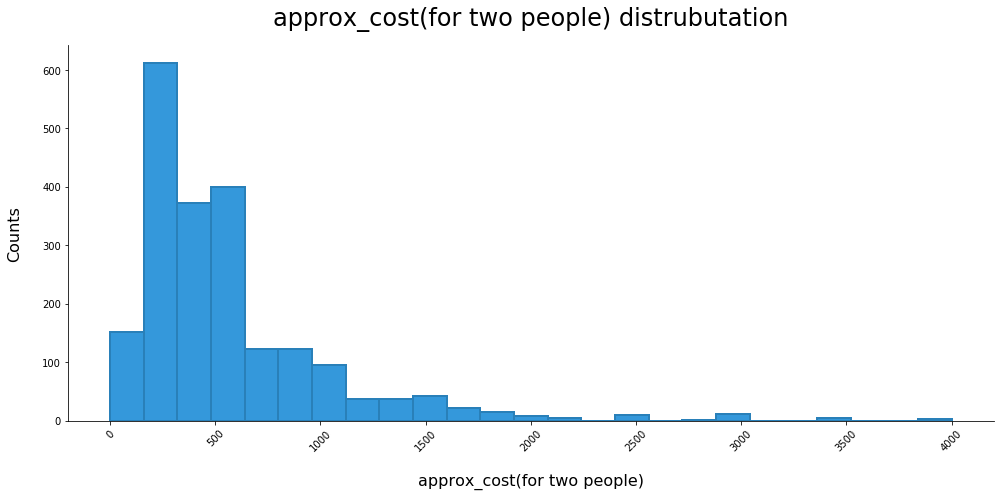

In [10]:
def con2(x):
    try:
        x = x.split(',')
        if len(x) > 1:
            return(float(x[0]+x[1]))
        else:
            return(float(x[0]))
    except:
        return(0.0)

## approx_cost(for two people)
col_name = 'approx_cost(for two people)'
df[col_name] = df[col_name].apply(lambda x: con2(x))
make_histogram(df, col_name, title=f'{col_name} distrubutation', \
               xlab=col_name, ylab='Counts')

### Rating  And Votes exploration

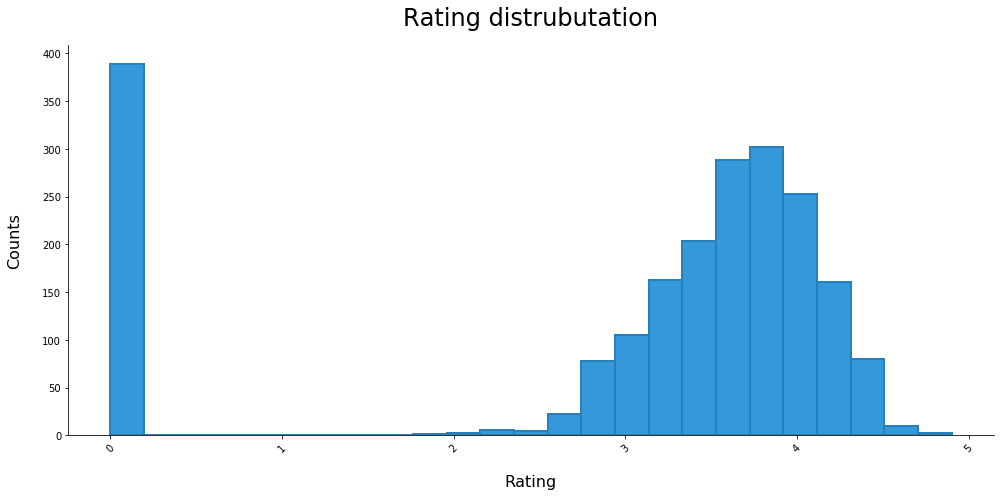

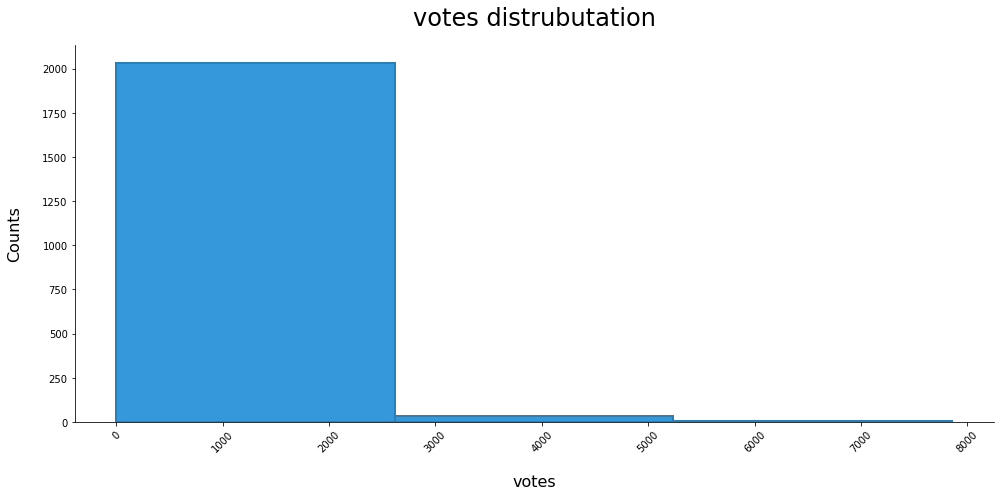

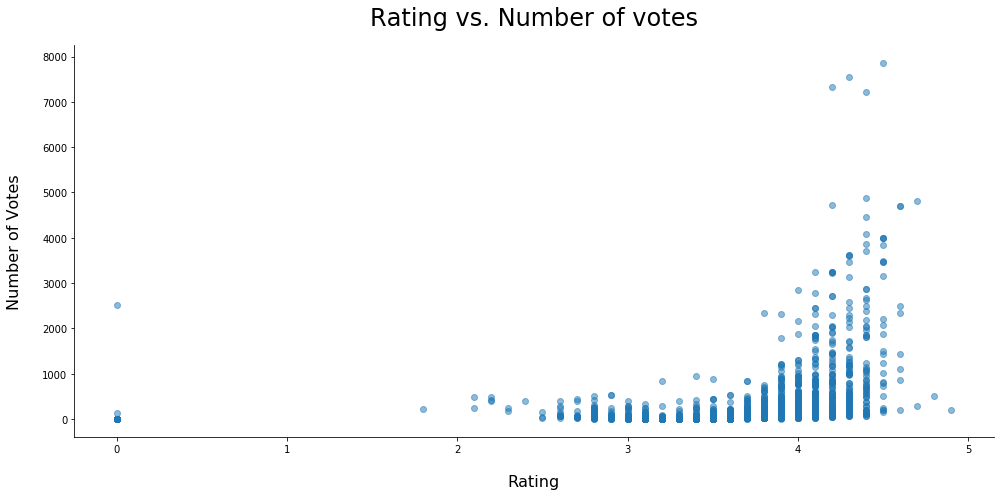

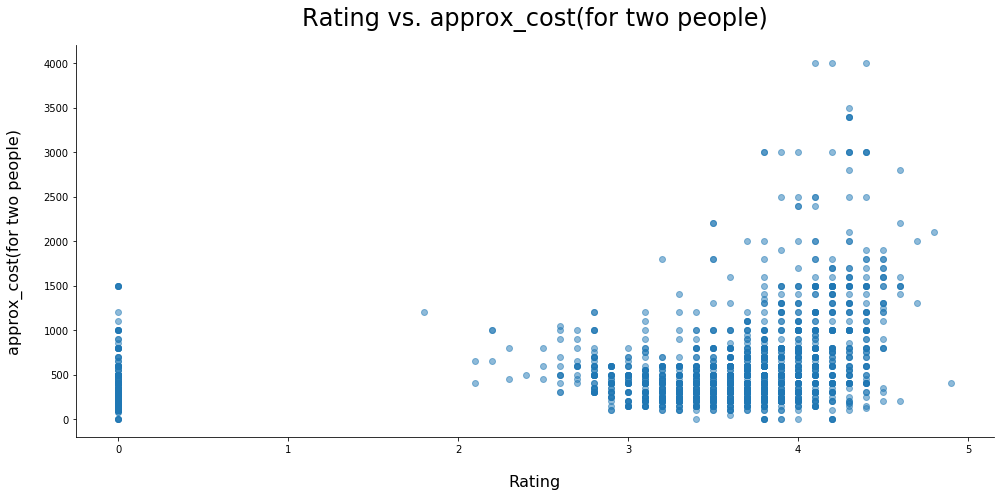

In [11]:
#convert rate colum
df['rating'] = df['rate'].apply(lambda x: con(x))

#rating expolaration
make_histogram(df, 'rating', title='Rating distrubutation', xlab='Rating', ylab='Counts')

#votes expolaration
make_histogram(df, 'votes', title='votes distrubutation',bins=3, xlab='votes', ylab='Counts')

#rating Vs votes
make_scatter(df,'rating', 'votes',title='Rating vs. Number of votes', xlab='Rating', ylab='Number of Votes')

#You can see a trend here — as a shop gets more votes it’s  ratings tends to increase. 
#This also makes perfect sense if you think about it. If more and more people are voting a 
#particular shop, it probably has a good budget and good marketing, which would mean that it’s
#a good of some sort, and they are generally highly rated.

#rating Vs approx_cost(for two people)
make_scatter(df,'rating', 'approx_cost(for two people)',title='Rating vs. approx_cost(for two people)', \
             xlab='Rating', ylab='approx_cost(for two people)')
## you can see high cost resived good rating